In [5]:
import pandas as pd

from src import get_config, plot_autocorrelation

config = get_config()
stations_timeseries = pd.read_csv(
    config.processed_data_path / "stations_timeseries.csv",
    index_col=0,
    parse_dates=True,
)
# Convert columns to string
stations_timeseries.columns = stations_timeseries.columns.astype(str)

In [7]:
stations_timeseries[str(config.target_station_id)]

timestamps
2022-01-01 00:13:20.603583    19
2022-01-01 01:13:21.911079    19
2022-01-01 02:13:23.718951    19
2022-01-01 03:13:23.902654    18
2022-01-01 04:13:26.826536    18
                              ..
2022-12-31 19:57:50.302819     8
2022-12-31 20:57:50.382304     4
2022-12-31 21:57:52.761035     3
2022-12-31 22:57:53.608384     3
2022-12-31 23:57:54.886111     3
Name: 90, Length: 8738, dtype: int64

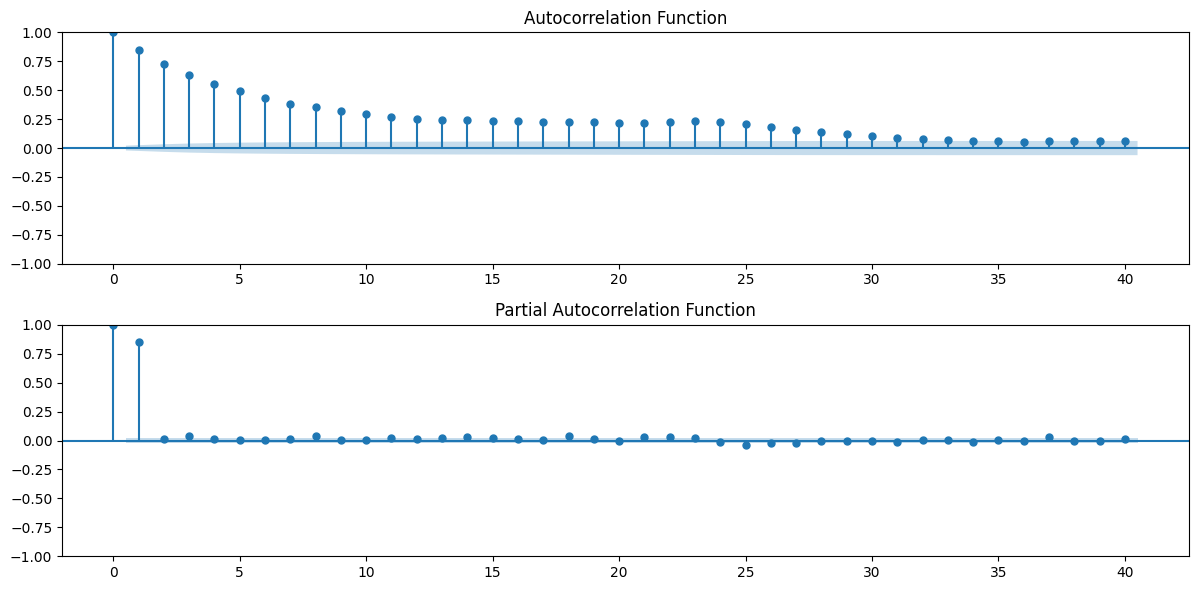

In [9]:
target_serie = stations_timeseries[str(config.target_station_id)]
plot_autocorrelation(
    stations_timeseries[str(config.target_station_id)],
)